# Import das Bibliotecas que serão utilizadas

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler #Z-score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


## Importando os datasets

Esses datasets fazem parte do Desafio do Kaggle Playground Series - Season 4, Episode 2;
Multi-Class Prediction of Obesity Risk


https://www.kaggle.com/competitions/playground-series-s4e2

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Avaliação Inicial dos Dados

In [3]:
train.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc['min'] = train.min()
desc['max'] = train.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,20758,20758,100.000000,0,0.0,0,20757
Gender,object,20758,2,0.009635,0,0.0,Female,Male
Age,float64,20758,1703,8.204066,0,0.0,14.0,61.0
Height,float64,20758,1833,8.830330,0,0.0,1.45,1.975663
Weight,float64,20758,1979,9.533674,0,0.0,39.0,165.057269
family_history_with_overweight,object,20758,2,0.009635,0,0.0,no,yes
FAVC,object,20758,2,0.009635,0,0.0,no,yes
FCVC,float64,20758,934,4.499470,0,0.0,1.0,3.0
NCP,float64,20758,689,3.319202,0,0.0,1.0,4.0
CAEC,object,20758,4,0.019270,0,0.0,Always,no


Podemos ver que temos 20758 linhas e 18 colunas, contando com o nosso alvo, fazendo com tenhamos 12 features, com pelo menos 8 delas sendo categóricas(Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC e MTRANS).

## Avaliando o dataset de teste.

In [5]:
test.head(10)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


In [6]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] / len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc['min'] = test.min()
desc['max'] = test.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,13840,13840,100.000000,0,0.0,20758,34597
Gender,object,13840,2,0.014451,0,0.0,Female,Male
Age,float64,13840,1539,11.119942,0,0.0,14.0,61.0
Height,float64,13840,1739,12.565029,0,0.0,1.45,1.98
Weight,float64,13840,1798,12.991329,0,0.0,39.0,165.057269
family_history_with_overweight,object,13840,2,0.014451,0,0.0,no,yes
FAVC,object,13840,2,0.014451,0,0.0,no,yes
FCVC,float64,13840,828,5.982659,0,0.0,1.0,3.0
NCP,float64,13840,649,4.689306,0,0.0,1.0,4.0
CAEC,object,13840,4,0.028902,0,0.0,Always,no


No dataset de teste temos 13840 linhas. Não existe nenhum valor faltante em ambos os datasets.

# Análise Exploratória

In [7]:
raw_num_cols = list(train.select_dtypes("float").columns)
raw_cat_cols = list(train.columns.drop(raw_num_cols+['NObeyesdad']))
full_form = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Histórico de sobrepeso na família',
    'FAVC': 'Frequência de consumo de alimentos de alta caloria',
    'FCVC': 'Frequência de consumo de vegetais',
    'NCP': 'Número de refeições principais',
    'CAEC': 'Consumo de alimentos entre refeições',
    'SMOKE': 'Fuma',
    'CH2O': 'Consumo de água',
    'SCC': 'Monitora consumo de calorias',
    'FAF': 'Frequência de atividade física',
    'TUE': 'Tempo de uso de eletrônicos',
    'CALC': 'Consumo de álcool',
    'MTRANS': 'Transporte utilizado'
}


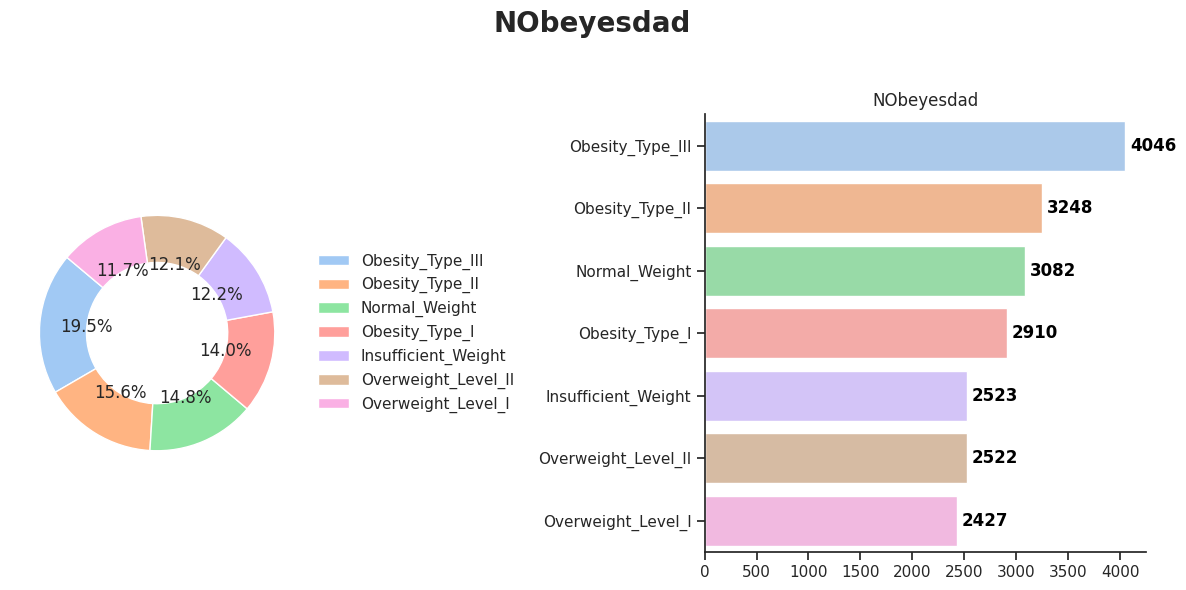

In [8]:
counts = train['NObeyesdad'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Gráfico de rosca (donut)
wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

# Gráfico de barras horizontais
sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('NObeyesdad')

# Título geral
fig.suptitle('NObeyesdad', fontsize=20, fontweight='bold')

# Ajuste de layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Podemos ver que a Obesidade tipo 3 é a mais predominante com cerca de 19.5% do casos. E vemos também que pelo menos 49.1% possui algum tipo de obesidade.

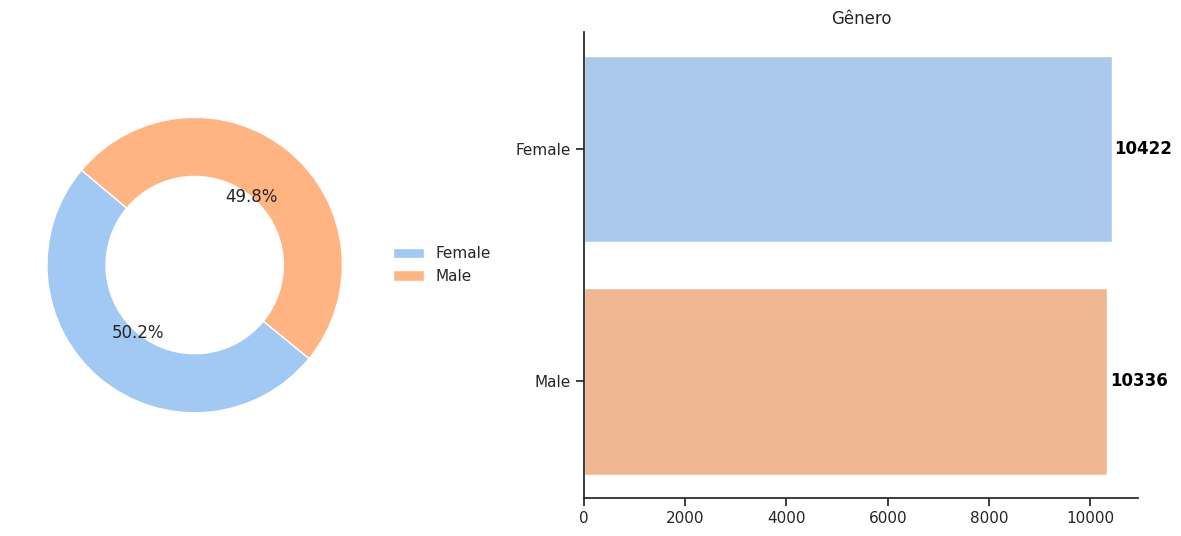

In [9]:
counts = train['Gender'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

# Gráfico de rosca (donut)
wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

# Gráfico de barras horizontais
sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['Gender'])

# Título geral
fig.suptitle('', fontsize=20, fontweight='bold')

# Ajuste de layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Podemos ver um distrubuição semelhante de Homens e Mulheres.

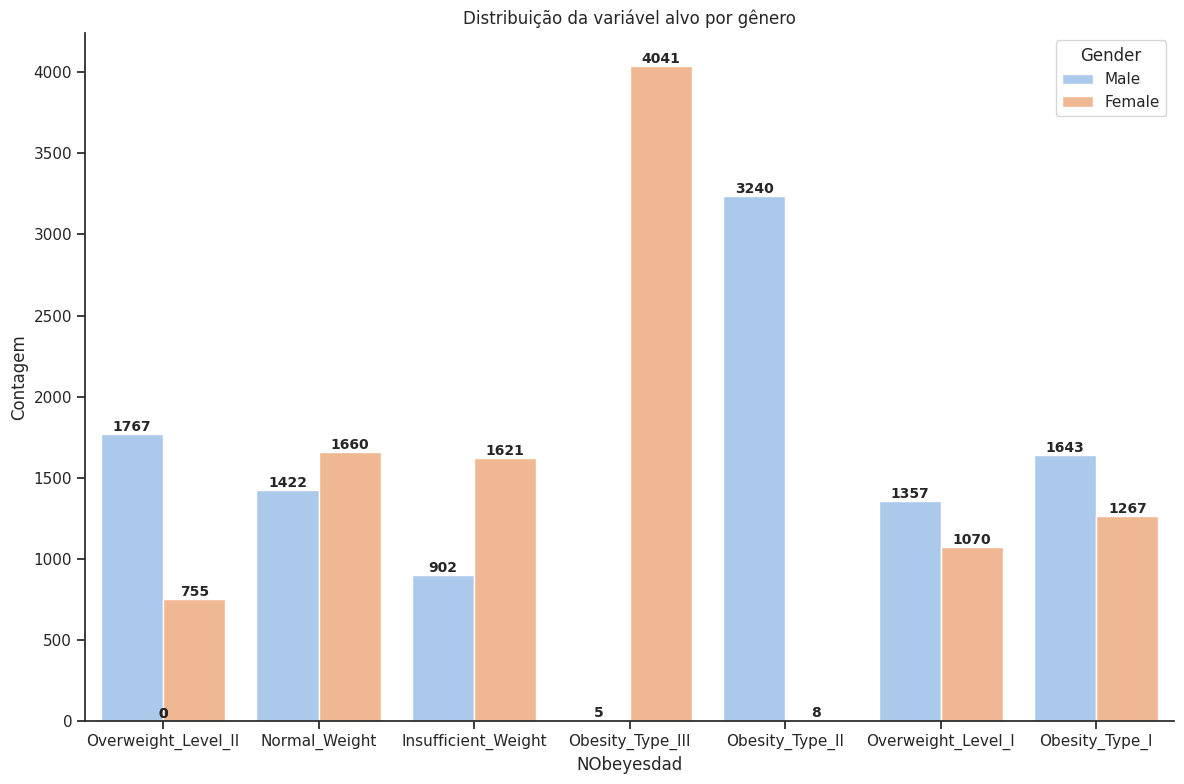

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=train, x='NObeyesdad', hue='Gender', palette = 'pastel')
plt.title('Distribuição da variável alvo por gênero')
plt.xlabel('NObeyesdad')
plt.ylabel('Contagem')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Com base no gráfico anterior podemos ver que a Obesidade tipo 3 acontece predominantemente em mulheres, enquanto a do tipo 2 em homens.

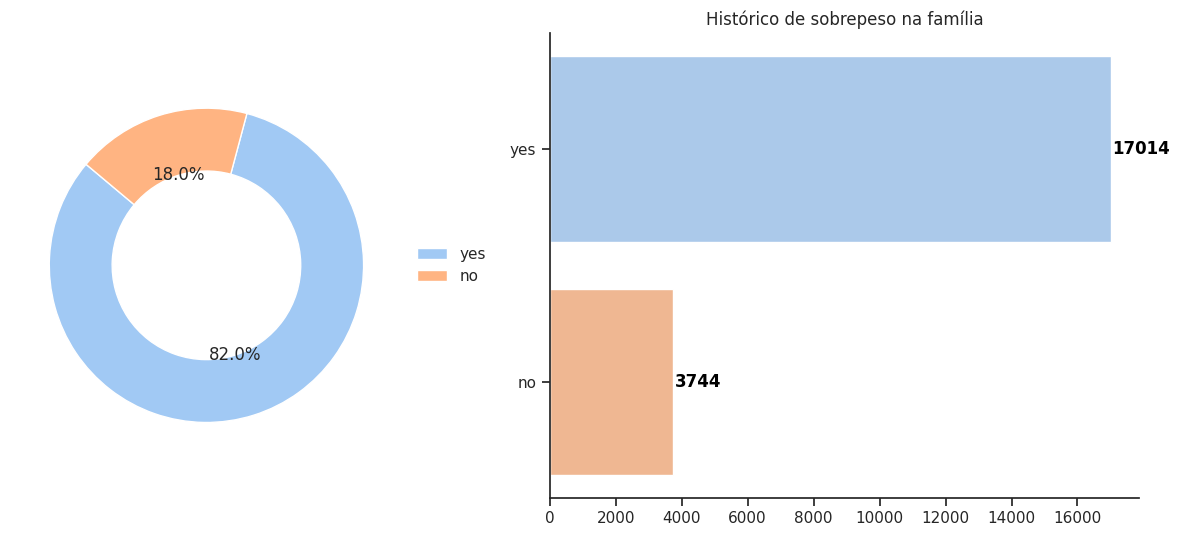

In [11]:
counts = train['family_history_with_overweight'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['family_history_with_overweight'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

82% possui histórico de sobrepeso na família.

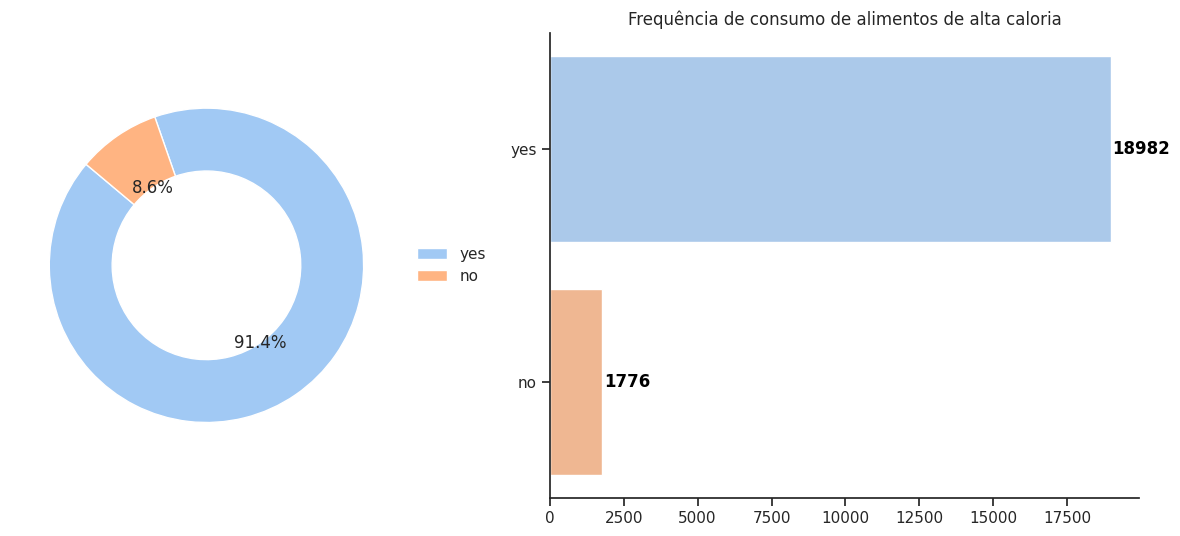

In [12]:
counts = train['FAVC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['FAVC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

91.4% dos indivíduos consomem com frequência alimentos de alta caloria

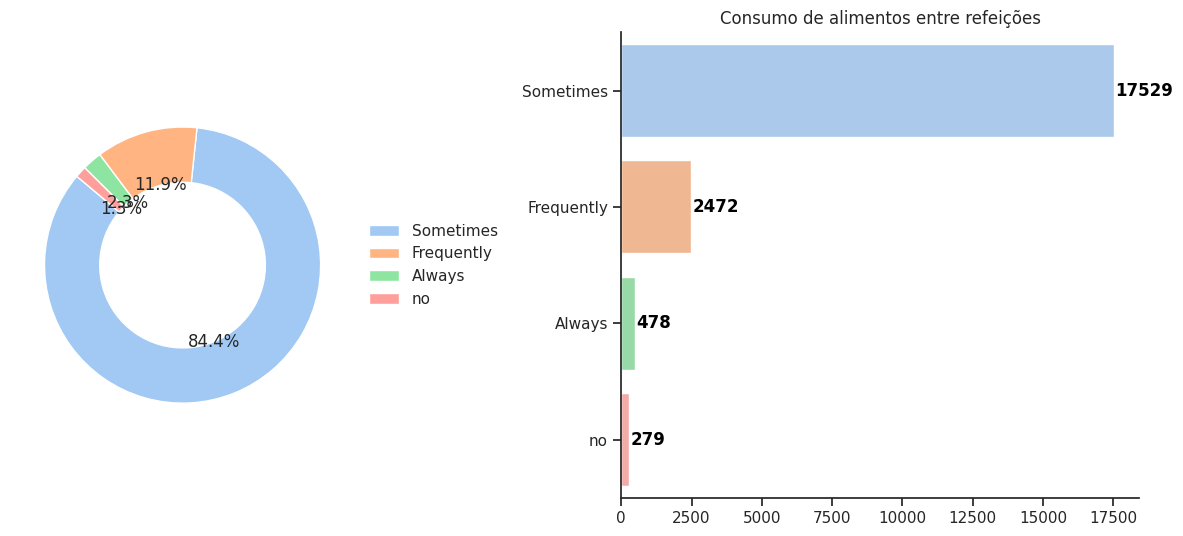

In [13]:
counts = train['CAEC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['CAEC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Temos que apenas aproximadamente 1.3% não consome alimentos entre refeições.

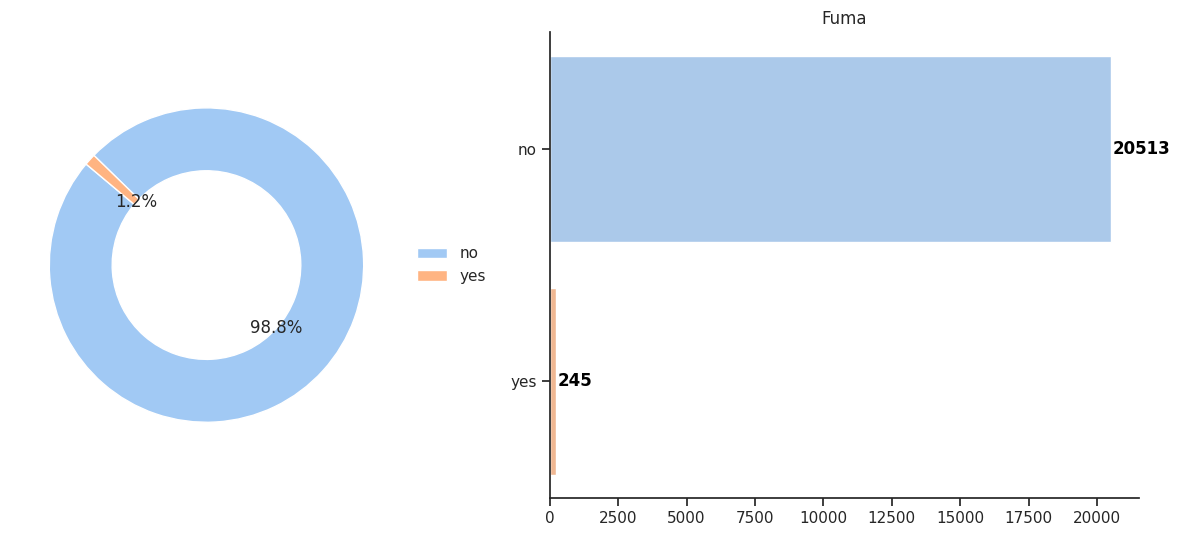

In [14]:
counts = train['SMOKE'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['SMOKE'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

A grande maioria diz não fumar.

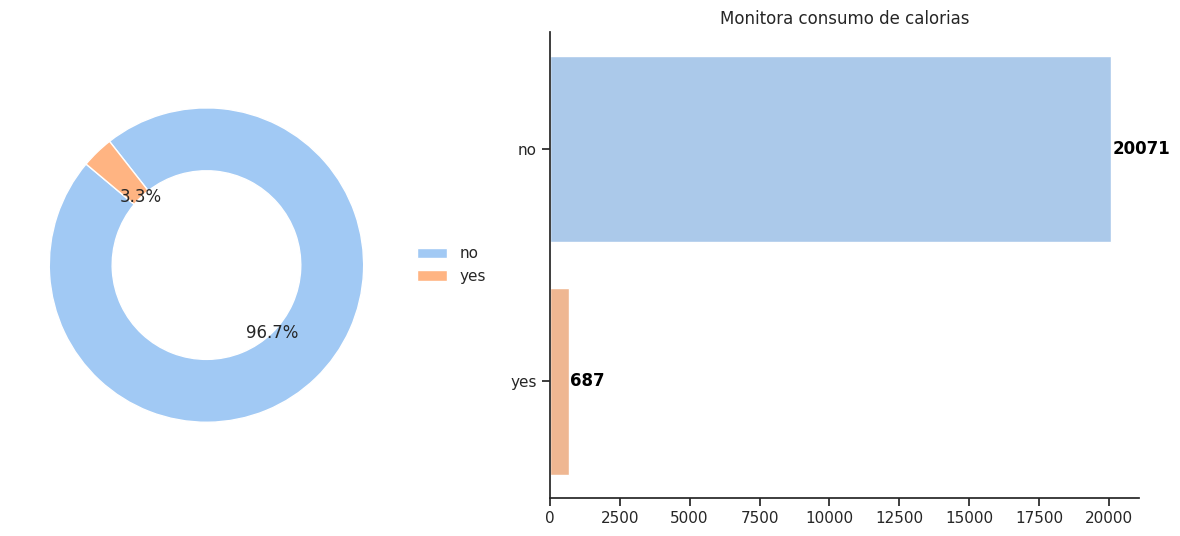

In [15]:
counts = train['SCC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['SCC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Temos cerca de 96.7% das pessoas não monitoram o consumo de calorias.

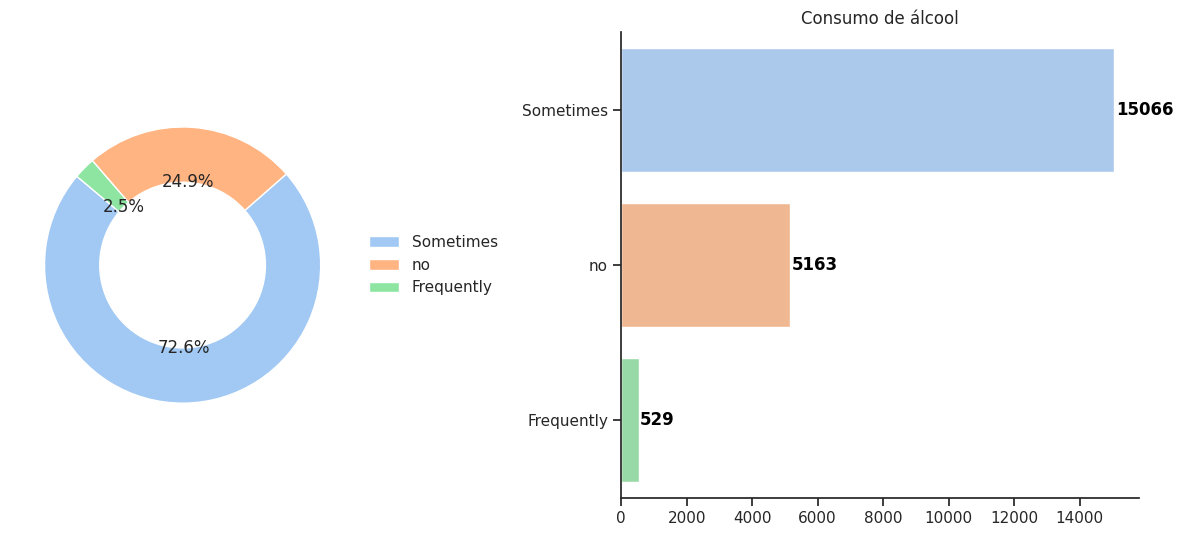

In [16]:
counts = train['CALC'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['CALC'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Aproximadamente 24.9% não consume álcool

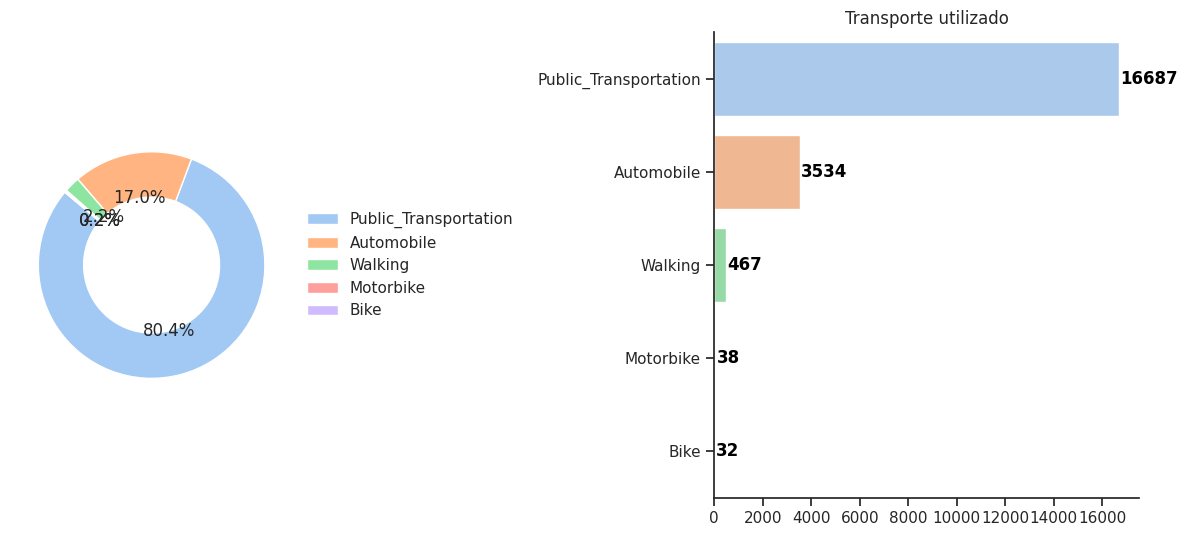

In [17]:
counts = train['MTRANS'].value_counts()
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 1.5]})

wedges, texts, autotexts = ax[0].pie(
    counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
ax[0].set_title('')
ax[0].legend(counts.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax[0].set_aspect('equal')

sns.barplot(
    y=counts.index,
    x=counts.values,
    ax=ax[1],
    palette=colors
)
for i, v in enumerate(counts.values):
    ax[1].text(v + 50, i, str(v), color='black', va='center', fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(full_form['MTRANS'])

fig.suptitle('', fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Dados Numéricos

### Boxplots

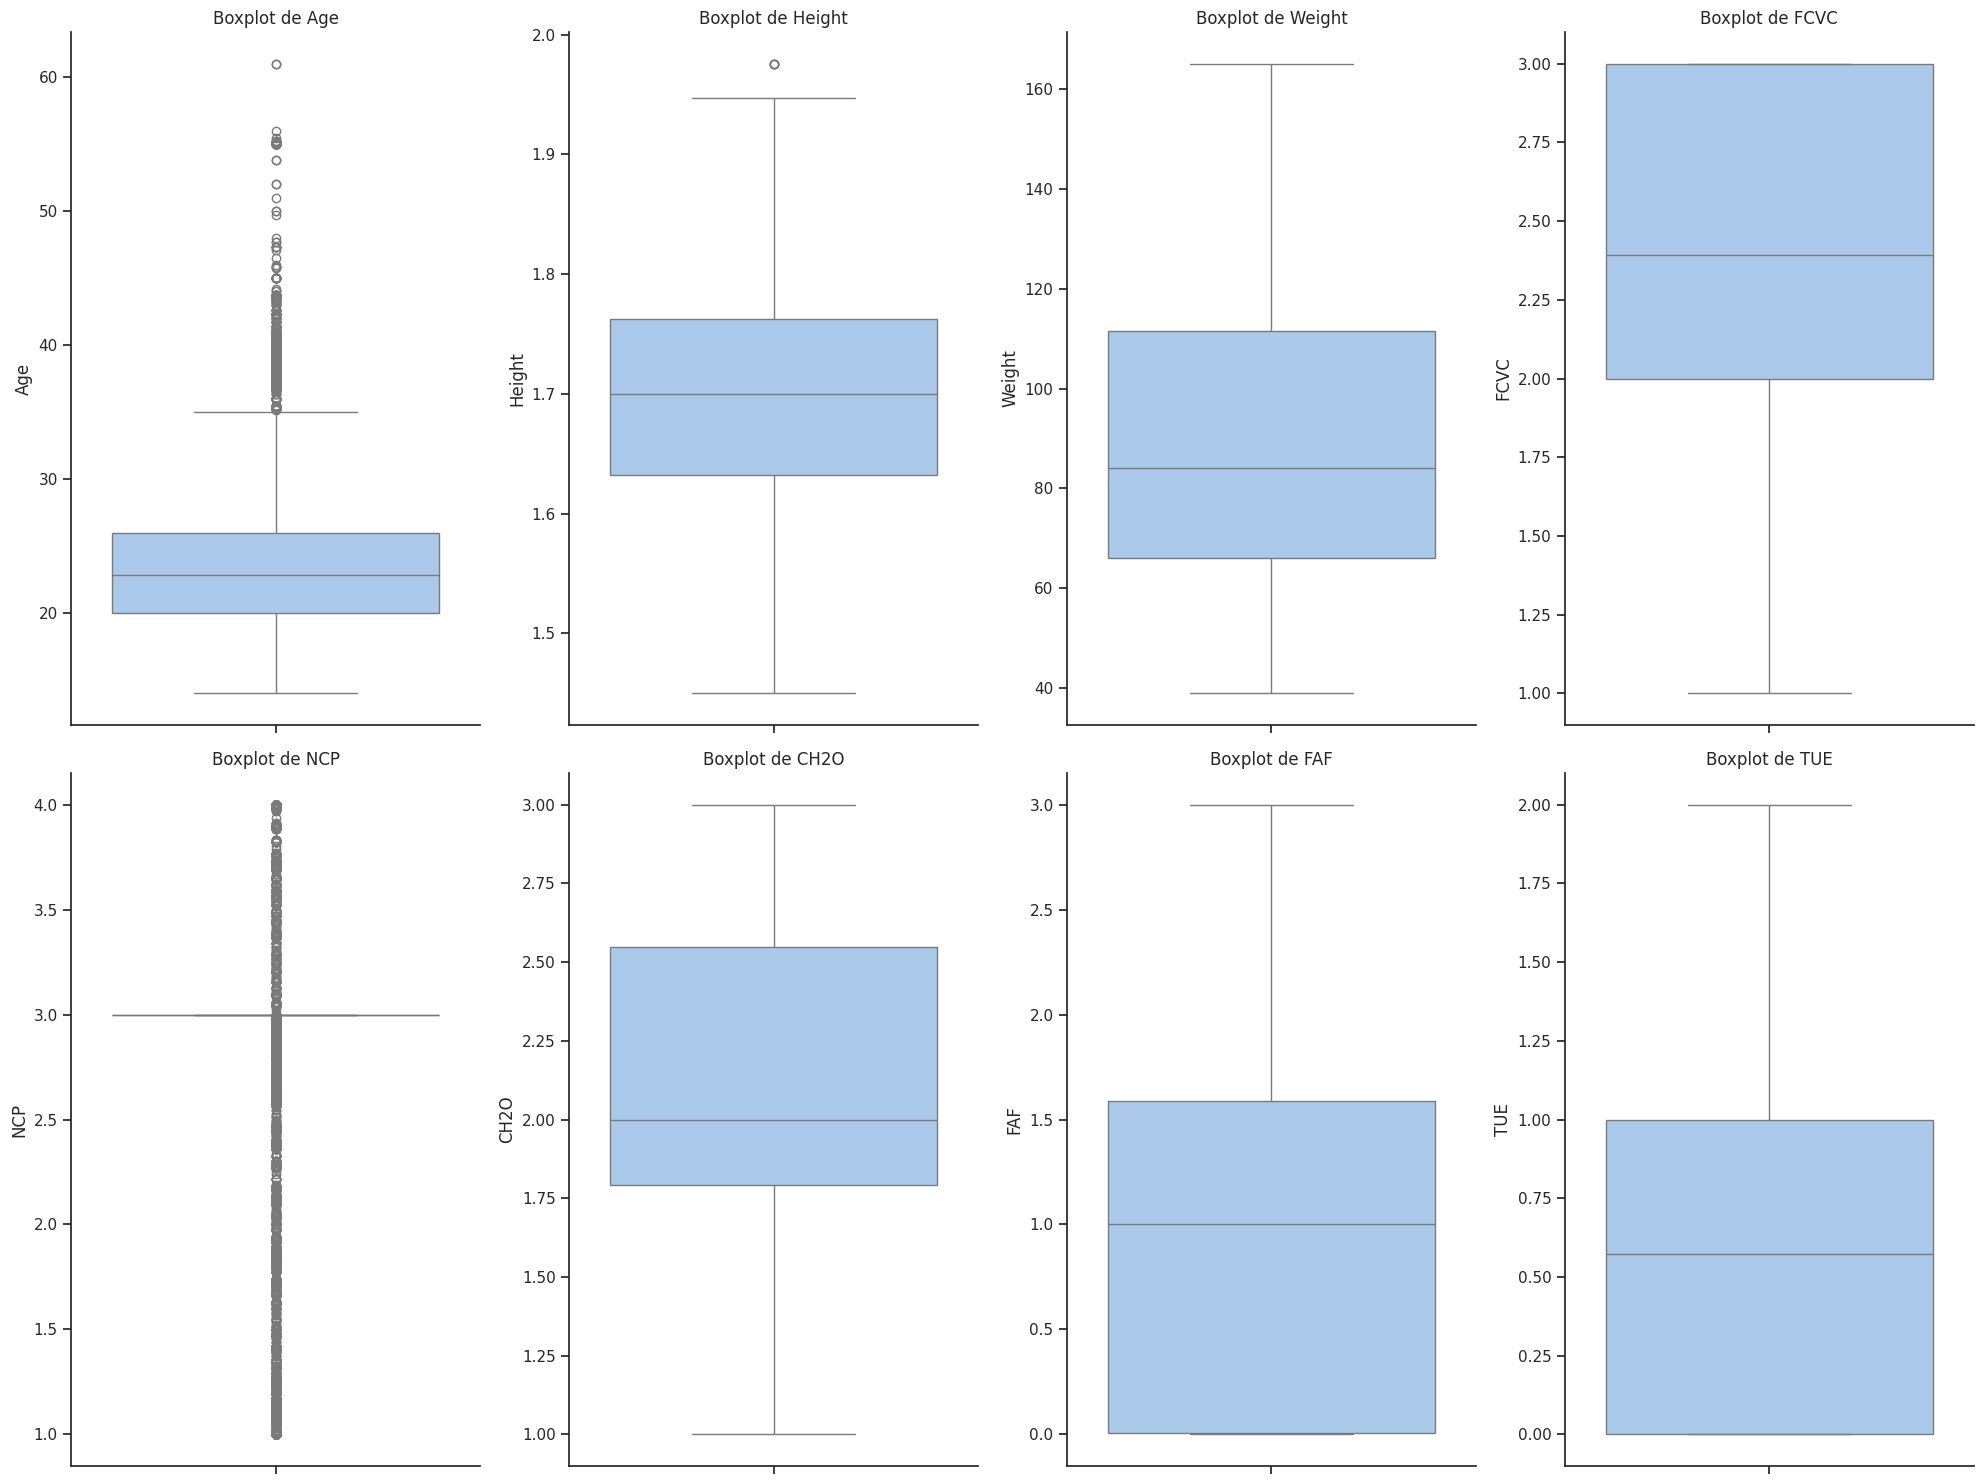

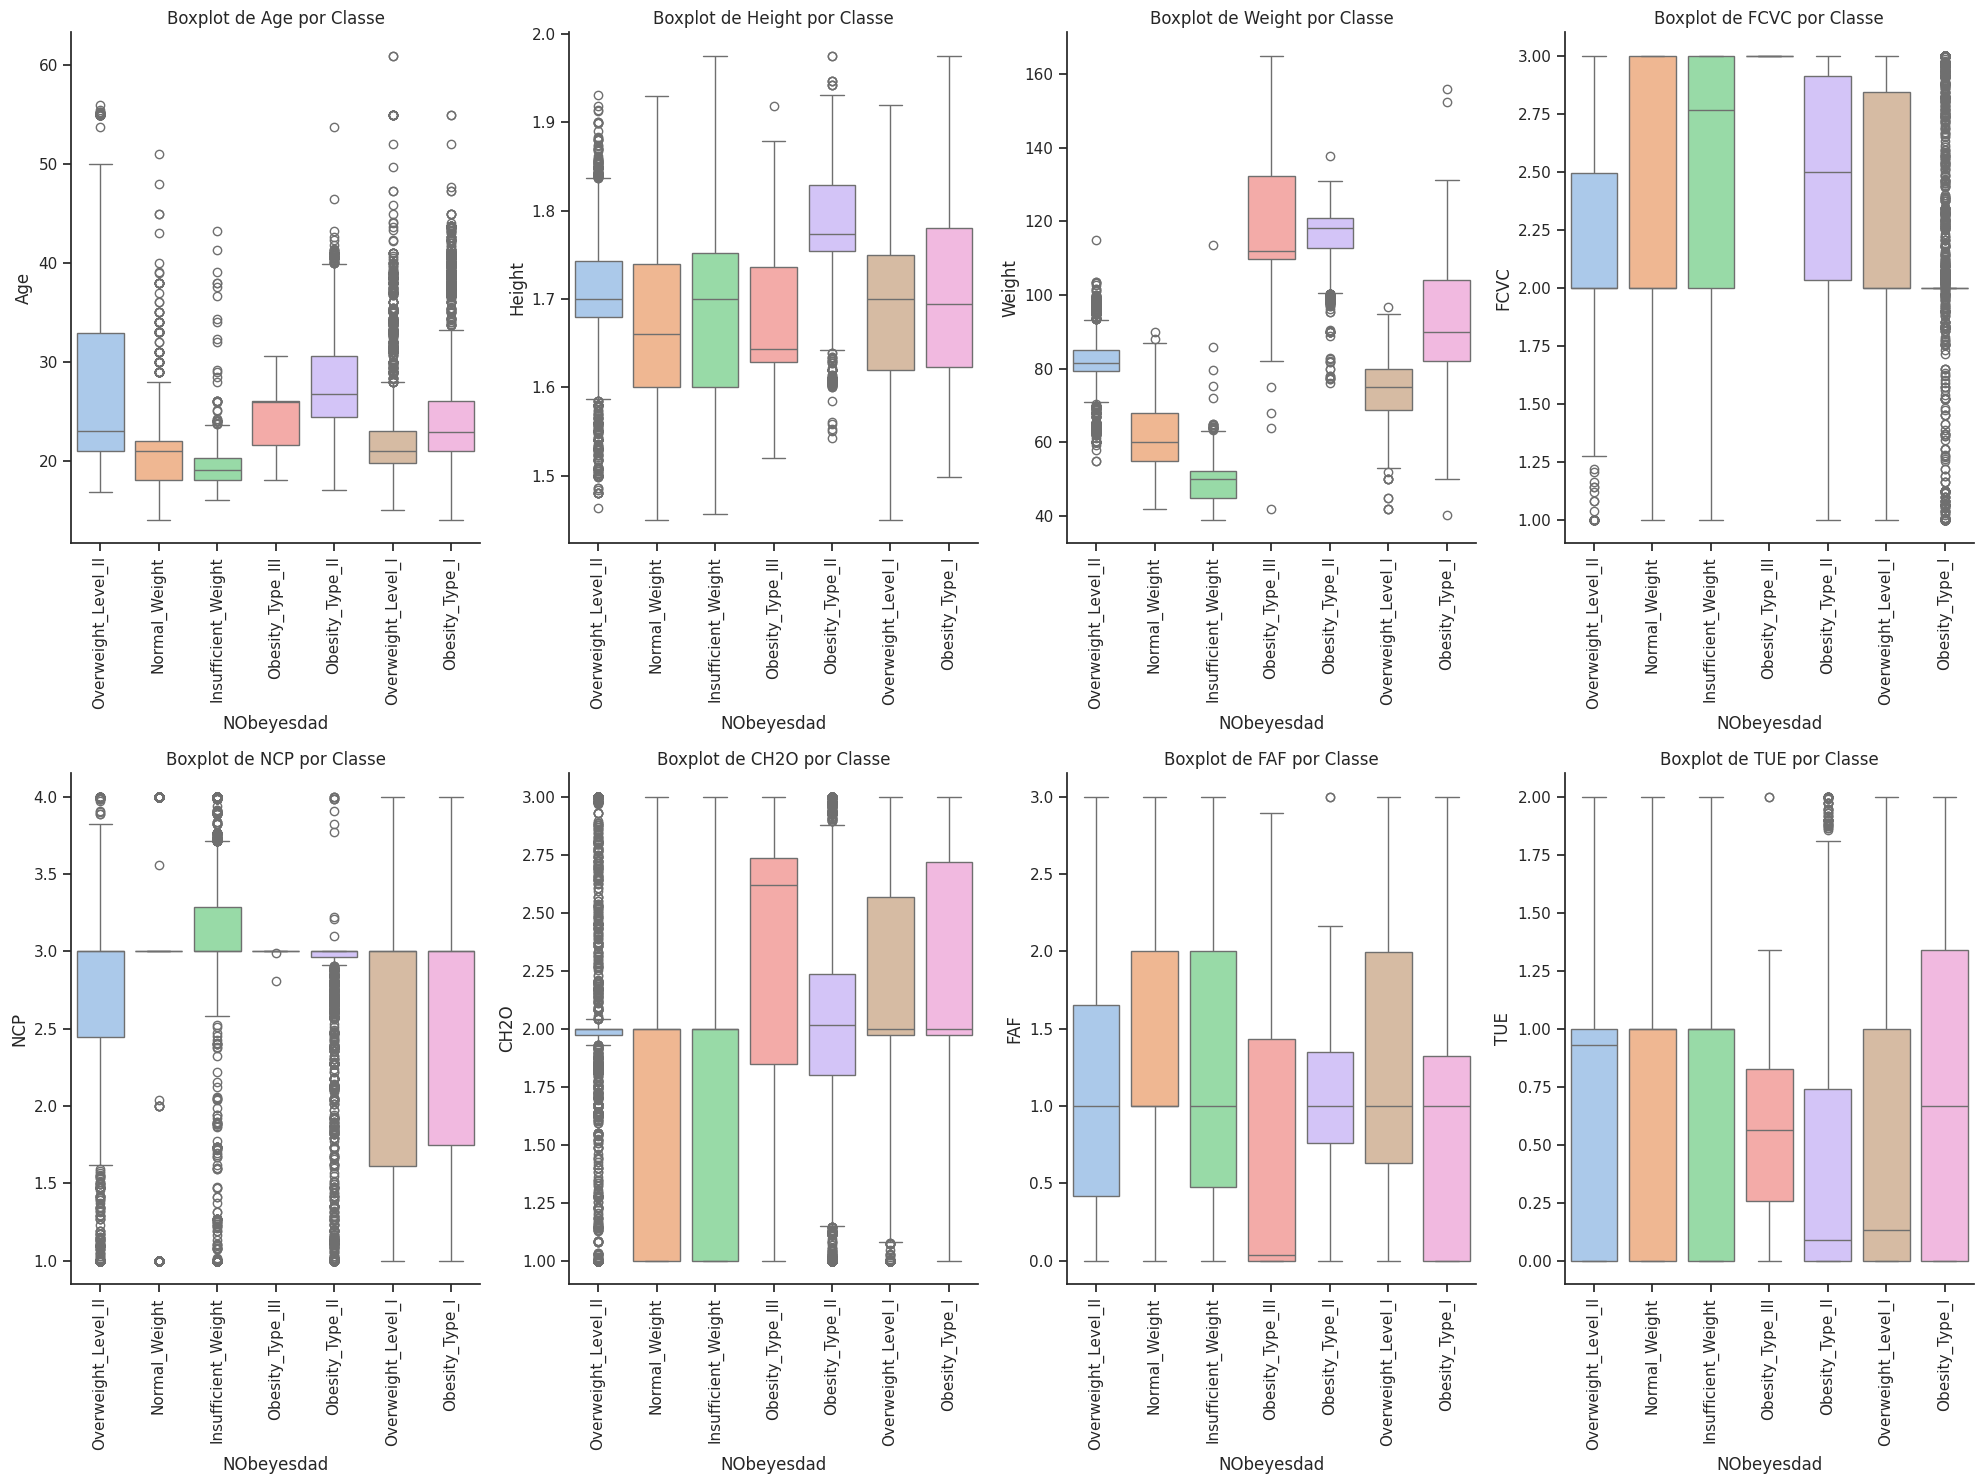

In [18]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(raw_num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=train, y=column, palette='pastel')
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# Boxplots por classe
plt.figure(figsize=(20, 15))
for i, column in enumerate(raw_num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=train, x='NObeyesdad', y=column, palette='pastel')
    plt.title(f'Boxplot de {column} por Classe')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Matriz de correlação

<Axes: >

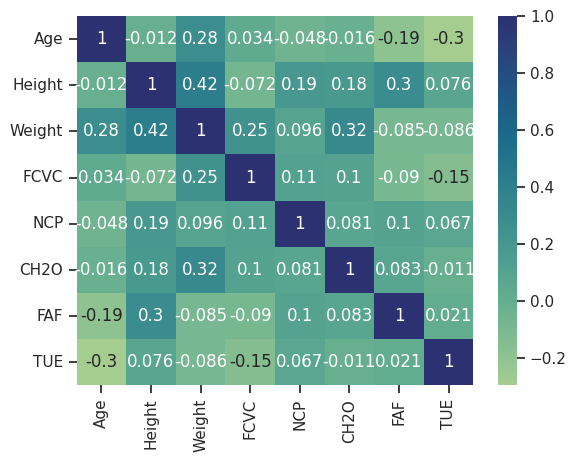

In [19]:
tmp = train[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True,cmap ="crest")

Com a matriz de correlação podemos observar que altura e peso se correlacionam positivamente, assim como idade e altura e consumo de água com o peso.

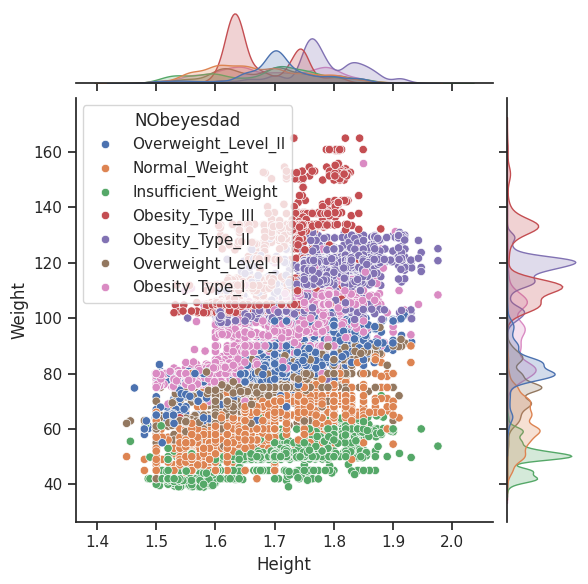

In [20]:
sns.jointplot(data=train, x="Height", y="Weight", hue='NObeyesdad',height=6)

Não da pra descrever de forma clara a relação de altura e peso com o tipo de obesidade, mas podemos correlacionar o peso com altura a partir do IMC que é dado pela fórmula: Peso/(Altura^2)

In [21]:
train['IMC'] = ((train['Weight'])/(train['Height']**2))
train['IMC'].value_counts()

,count
IMC,
17.301038,191
27.681661,179
29.384757,148
25.951557,139
26.672763,122
...,...
44.175600,1
25.371174,1
39.927358,1


In [22]:
test['IMC'] = ((test['Weight'])/(test['Height']**2))
test['IMC'].value_counts()

,count
IMC,
17.301038,143
29.384757,122
27.681661,115
26.989619,73
25.951557,70
...,...
17.774646,1
43.656514,1
32.161885,1


<Axes: ylabel='IMC'>

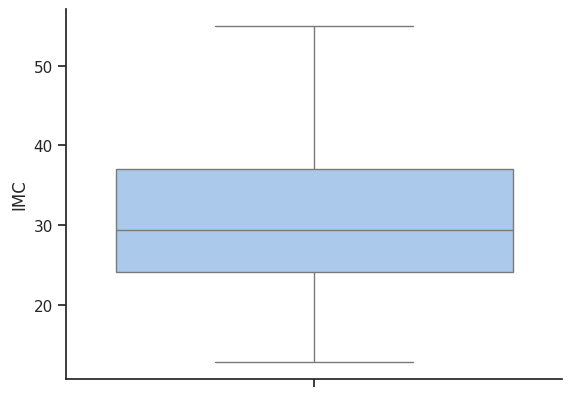

In [23]:
sns.boxplot(data=train, y='IMC', palette='pastel')

<Axes: xlabel='IMC', ylabel='Count'>

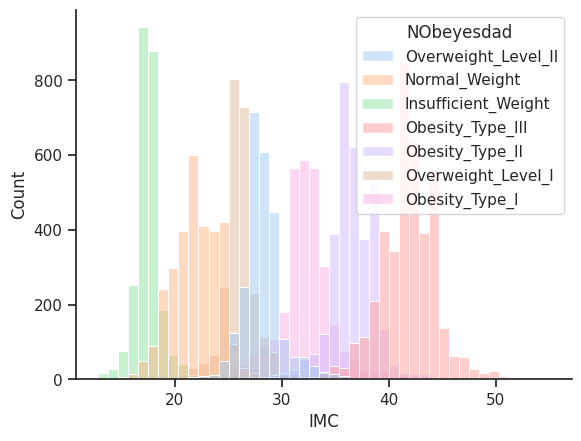

In [24]:
sns.histplot(data=train, x='IMC', hue='NObeyesdad', palette='pastel')

Com o IMC podemos ver melhor as relações com os tipos de obesidade, pessoas com menos de 20 de IMC, a maioria, esta na categoria de peso insuficiente, enquanto os que tem IMC maior que 40 estão na obesidade tipo 3 (que como vimos anteriormente é composto em sua grande maioria por mulheres)

# Pré-processamento dos dados

## Transformando os dados categóricos em numéricos

Para isso, eu fiz um label encoding, onde dados categóricos que favorecem o sobrepeso/obesidade possuem valores maiores.

In [25]:
train['NObeyesdad'].unique()


array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [26]:
target_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

train['NObeyesdad'] = train['NObeyesdad'].map(target_map)
train['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4])

In [27]:
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})

train['Gender'].unique()

array([0, 1])

In [28]:
test['Gender'].unique()

array([0, 1])

In [29]:
train['family_history_with_overweight'] = train['family_history_with_overweight'].map({'yes': 1, 'no': 0})
test['family_history_with_overweight'] = test['family_history_with_overweight'].map({'yes': 1, 'no': 0})
train['family_history_with_overweight'].unique()


array([1, 0])

In [30]:
test['family_history_with_overweight'].unique()


array([1, 0])

In [31]:
train['FAVC'] = train['FAVC'].map({'no': 0, 'yes': 1})
test['FAVC'] = test['FAVC'].map({'no': 0, 'yes': 1})
train['FAVC'].unique()

array([1, 0])

In [32]:
test['FAVC'].unique()

array([1, 0])

In [33]:
train['CAEC'] = train['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
test['CAEC'] = test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
train['CAEC'].unique()

array([1, 2, 0, 3])

In [34]:
test['CAEC'].unique()

array([1, 3, 2, 0])

In [35]:
train['SMOKE'] = train['SMOKE'].map({'no': 0, 'yes': 1})
test['SMOKE'] = test['SMOKE'].map({'no': 0, 'yes': 1})
train['SMOKE'].unique()


array([0, 1])

In [36]:
test['SMOKE'].unique()

array([0, 1])

In [37]:
train['SCC'] = train['SCC'].map({'no': 1, 'yes': 0})
test['SCC'] = test['SCC'].map({'no': 1, 'yes': 0})
train['SCC'].unique()


array([1, 0])

In [38]:
test['SCC'].unique()

array([1, 0])

In [39]:
train['CALC'] = train['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2})
test['CALC'] = test['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2})
train['CALC'].unique()

array([1, 0, 2])

In [40]:
test['CALC'].unique()

array([ 1.,  0.,  2., nan])

In [41]:
train['MTRANS'] = train['MTRANS'].map({'Walking': 1, 'Bike': 0, 'Motorbike': 2, 'Public_Transportation': 4, 'Automobile': 3})
test['MTRANS'] = test['MTRANS'].map({'Walking': 1, 'Bike': 0, 'Motorbike': 2, 'Public_Transportation': 4, 'Automobile': 3})
train['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [42]:
test['MTRANS'].unique()

array([4, 3, 1, 0, 2])

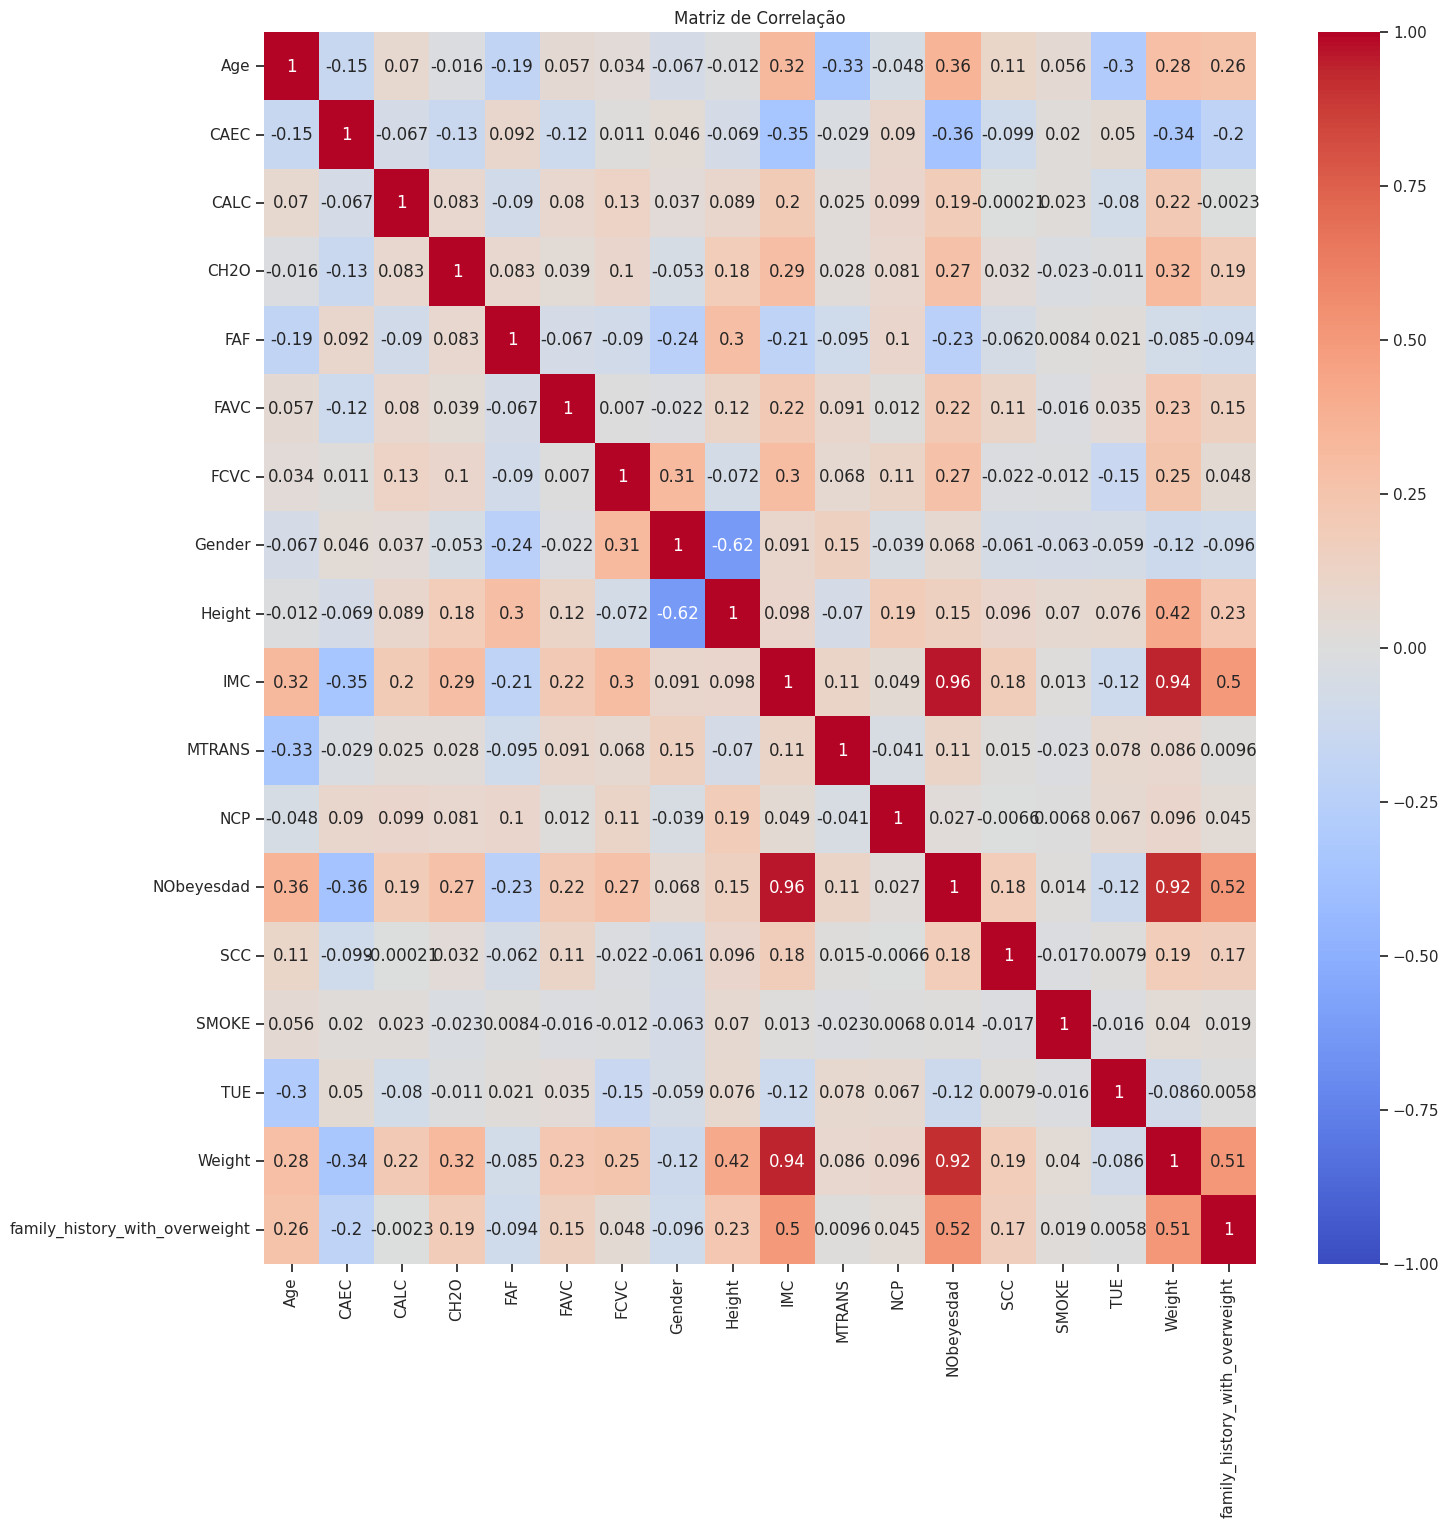

In [43]:
train = train.drop('id', axis=1)
test_id = test['id']
test = test.drop('id', axis=1)
train = train.astype(float)
test = test.astype(float)

corr_matrix = train.corr()

sorted_corr = corr_matrix['NObeyesdad'].sort_index(ascending=True)

corr_columns = sorted_corr.index

subset_corr = corr_matrix.loc[corr_columns, corr_columns]

plt.figure(figsize=(16, 16))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()




In [44]:
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Utilizando Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
folds = [3, 5, 7, 9]

for fold in folds:
    scores = cross_val_score(gnb, X_train, y_train, cv=fold)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))




0.7692 accuracy with a standard deviation of 0.0062
0.7748 accuracy with a standard deviation of 0.0038
0.7745 accuracy with a standard deviation of 0.0063
0.7749 accuracy with a standard deviation of 0.0074


In [46]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo Naive Bayes é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))


              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86       604
         1.0       0.66      0.82      0.73       499
         2.0       0.52      0.66      0.59       382
         3.0       0.58      0.58      0.58       514
         4.0       0.64      0.61      0.63       565
         5.0       0.94      0.81      0.87       761
         6.0       1.00      0.97      0.98       827

    accuracy                           0.77      4152
   macro avg       0.75      0.75      0.75      4152
weighted avg       0.79      0.77      0.78      4152

A acurácia do modelo Naive Bayes é de: 77.43 %


Temos uma baseline de ~77.43% de acurácia

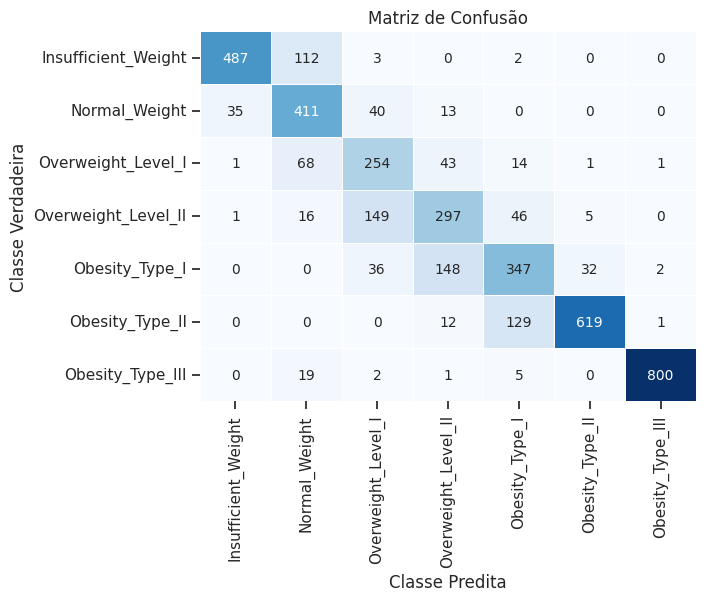

In [47]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.show()


Temos uma grande presença de Falsos Positivos

## Utilizando SVM

In [48]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo SVM é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       553
         1.0       0.82      0.87      0.84       589
         2.0       0.75      0.71      0.73       509
         3.0       0.70      0.74      0.72       488
         4.0       0.84      0.84      0.84       544
         5.0       0.97      0.96      0.96       666
         6.0       1.00      1.00      1.00       803

    accuracy                           0.87      4152
   macro avg       0.86      0.86      0.86      4152
weighted avg       0.87      0.87      0.87      4152

A acurácia do modelo SVM é de: 87.24 %


Temos uma acurácia de ~87.24%, o que já é uma melhora de quase 10% a mais em comparação com o Naive Bayes

Text(45.046874999999986, 0.5, 'Classe Verdadeira')

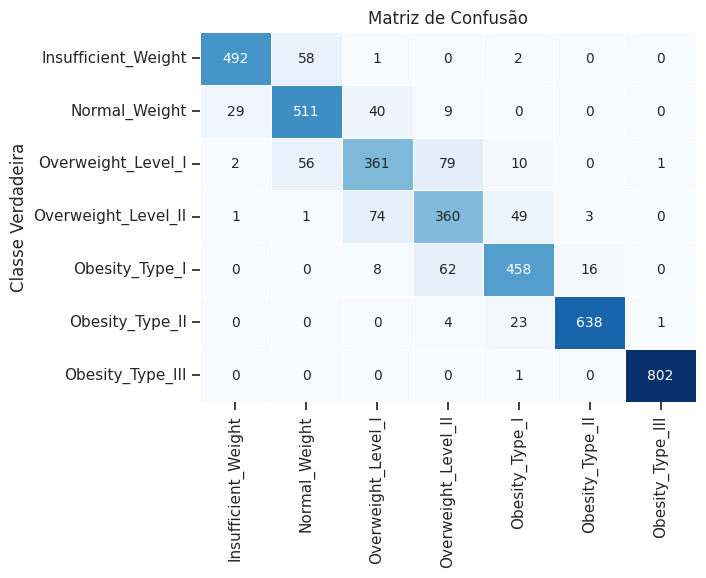

In [49]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')

Podemos perceber uma distribuição parecida de falsos positivos e falsos negativos

In [50]:
folds = [3, 5, 7, 9]

for fold in folds:
    scores = cross_val_score(clf, X_train, y_train, cv=fold)
    print("%0.4f de acurácia média com um desvio padrão de %0.4f, utilizando %d folds" % (scores.mean(), scores.std(), fold))

0.8644 de acurácia média com um desvio padrão de 0.0050, utilizando 3 folds
0.8652 de acurácia média com um desvio padrão de 0.0086, utilizando 5 folds
0.8643 de acurácia média com um desvio padrão de 0.0090, utilizando 7 folds
0.8659 de acurácia média com um desvio padrão de 0.0092, utilizando 9 folds


## Utilizando Floresta Aleatória

In [51]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = random_forest.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo Floresta Aleatória é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       523
         1.0       0.88      0.86      0.87       635
         2.0       0.78      0.76      0.77       498
         3.0       0.77      0.80      0.79       496
         4.0       0.86      0.87      0.87       537
         5.0       0.97      0.97      0.97       659
         6.0       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.90      0.90      0.90      4152

A acurácia do modelo Floresta Aleatória é de: 89.57 %


Text(45.046874999999986, 0.5, 'Classe Verdadeira')

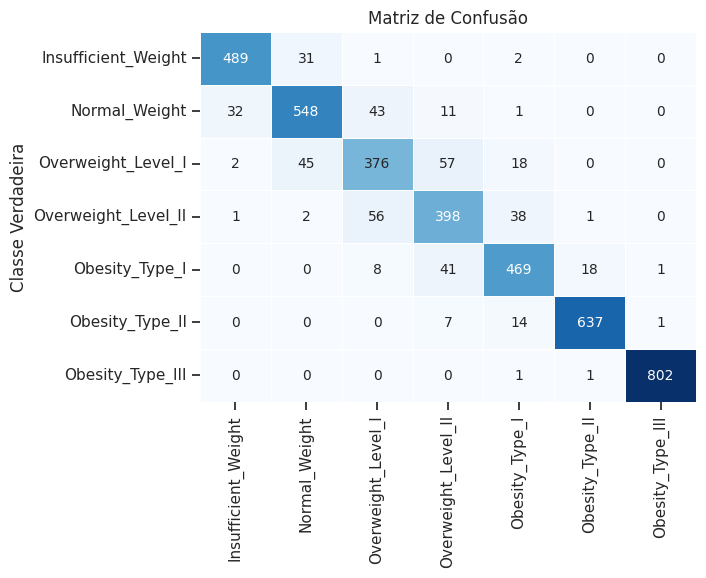

In [53]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')

In [54]:
folds = [3, 5, 7, 9]
for fold in folds:
    scores = cross_val_score(random_forest, X_train, y_train, cv=fold)
    print("%0.4f de acurácia com um desvio padrão de %0.4f, utilizando %d folds" % (scores.mean(), scores.std(), fold))



0.8993 de acurácia com um desvio padrão de 0.0072, utilizando 3 folds
0.8996 de acurácia com um desvio padrão de 0.0080, utilizando 5 folds
0.9003 de acurácia com um desvio padrão de 0.0080, utilizando 7 folds
0.8998 de acurácia com um desvio padrão de 0.0097, utilizando 9 folds


Com isso, vemos que o melhor modelo entre os utilizados é a de Floresta Aleatória com uma acurácia de ~89.57%

## Otimizando os parametros do modelo

In [ ]:
!pip install optuna

Para fazer isso, estarei utilizando a biblioteca Optuna

In [58]:
import optuna


def objective(trial):
    x, y = X_train, y_train

    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
    rf_max_estimators = trial.suggest_int('rf_max_estimators', 50, 500, log=True)
    random_forest = RandomForestClassifier(
        max_depth = rf_max_depth, n_estimators = rf_max_estimators, random_state=42
    )

    score = cross_val_score(random_forest, x, y, n_jobs=-1, cv=7)
    acuracy = score.mean()
    return acuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2025-05-16 17:01:32,515] A new study created in memory with name: no-name-6267c53e-b7f8-4360-b10b-379fd9129e85
[I 2025-05-16 17:01:51,626] Trial 0 finished with value: 0.7691806146864424 and parameters: {'rf_max_depth': 3, 'rf_max_estimators': 123}. Best is trial 0 with value: 0.7691806146864424.
[I 2025-05-16 17:02:44,081] Trial 1 finished with value: 0.8953399548420898 and parameters: {'rf_max_depth': 10, 'rf_max_estimators': 454}. Best is trial 1 with value: 0.8953399548420898.
[I 2025-05-16 17:02:50,742] Trial 2 finished with value: 0.8982907971647223 and parameters: {'rf_max_depth': 13, 'rf_max_estimators': 53}. Best is trial 2 with value: 0.8982907971647223.
[I 2025-05-16 17:03:03,388] Trial 3 finished with value: 0.8984111993078806 and parameters: {'rf_max_depth': 12, 'rf_max_estimators': 94}. Best is trial 3 with value: 0.8984111993078806.
[I 2025-05-16 17:03:25,549] Trial 4 finished with value: 0.9011209581655342 and parameters: {'rf_max_depth': 26, 'rf_max_estimators': 130

FrozenTrial(number=45, state=1, values=[0.9035898619771149], datetime_start=datetime.datetime(2025, 5, 16, 17, 29, 15, 112197), datetime_complete=datetime.datetime(2025, 5, 16, 17, 30, 5, 596897), params={'rf_max_depth': 19, 'rf_max_estimators': 330}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=True, low=2, step=1), 'rf_max_estimators': IntDistribution(high=500, log=True, low=50, step=1)}, trial_id=45, value=None)


Temos então que os melhores parametros para profundidade máxima é 32 e para o n_estimators 357 (rodando no meu pc)

In [60]:
rf_max_depth = 32
rf_max_estimators = 357

random_forest_opt = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_max_estimators, random_state=42)
random_forest_opt.fit(X_train, y_train)

y_pred = random_forest_opt.predict(X_test)

print(classification_report(y_pred, y_test))
print("A acurácia do modelo Floresta Aleatória é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       519
         1.0       0.88      0.87      0.87       634
         2.0       0.78      0.77      0.77       492
         3.0       0.79      0.80      0.80       508
         4.0       0.87      0.88      0.88       539
         5.0       0.97      0.97      0.97       656
         6.0       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

A acurácia do modelo Floresta Aleatória é de: 90.03 %


Usando os valores encontrados pelo colab: max_depth = 19 e max_estimators = 330

In [70]:
#essa celula so existe no colab
rf_max_depth = 19
rf_max_estimators = 330

random_forest_colab = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_max_estimators, random_state=42)
random_forest_colab.fit(X_train, y_train)

y_pred_colab = random_forest_opt.predict(X_test)

print(classification_report(y_pred_colab, y_test))
print("A acurácia do modelo Floresta Aleatória é de: {} %".format(round(100*accuracy_score(y_pred, y_test), 2)))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       519
         1.0       0.88      0.87      0.87       634
         2.0       0.78      0.77      0.77       492
         3.0       0.79      0.80      0.80       508
         4.0       0.87      0.88      0.88       539
         5.0       0.97      0.97      0.97       656
         6.0       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

A acurácia do modelo Floresta Aleatória é de: 90.03 %


Text(45.046874999999986, 0.5, 'Classe Verdadeira')

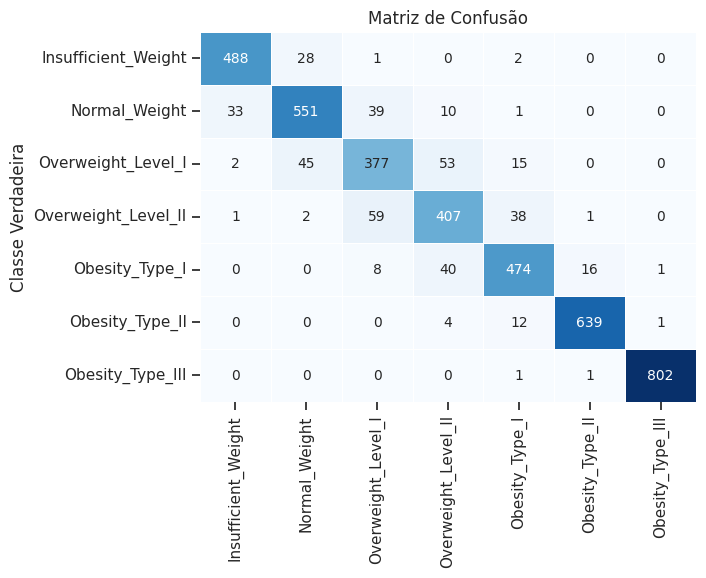

In [61]:
labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, annot_kws={'size': 10}, linewidths=0.5, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira')

# Preparando o arquivo para submeter ao Kaggle

In [62]:
import joblib

joblib.dump(random_forest_opt, 'random_forest.joblib')

['random_forest.joblib']

In [63]:
loaded_model = joblib.load('random_forest.joblib')

In [64]:
rf_y_pred = loaded_model.predict(test)
rf_y_pred.astype(int)

array([5, 2, 6, ..., 0, 1, 5])

In [65]:
model_results = pd.DataFrame({'id':test_id, 'NObeyesdad':rf_y_pred})

In [66]:
target_map_rev = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

model_results['NObeyesdad'] = model_results['NObeyesdad'].replace(target_map_rev)

In [67]:
model_results.head(10)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight


In [68]:
model_results[['id', 'NObeyesdad']].to_csv('submission0A.csv', index=False)